In [22]:
import numpy as np
import pandas as pd
from trajDTW import calculate_trajectory_attributes,plot_trajectory_dotplot

In [8]:
reshaped_data = np.load("../../../process/trajectory/20250415_odonto_run_3/reshaped_data.npy")

In [9]:
reshaped_data

array([[[0.00000000e+00, 0.00000000e+00, 2.43604006e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.43693543e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.43776942e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.63853079e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.07526084e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 9.39464877e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 9.23520662e-05, 3.37422796e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.13620080e-04, 3.40665489e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [54]:
conservation_results = pd.read_csv("../../../process/trajectory/20250415_odonto_run_2/conservation_scores.csv")
conservation_results


,Unnamed: 0,gene,raw_score,normalized_score,n_valid_samples,was_filtered
0,4688,Cxcl10,-2.424161,1.000000,2,False
1,12569,Npr3,-2.928585,0.997279,3,False
2,1706,Plcb1,-2.940192,0.997216,2,False
3,5987,Casc1,-2.966979,0.997071,2,False
4,15742,2810417H13Rik,-3.213036,0.995744,2,False
...,...,...,...,...,...,...
15861,15853,Gm7429,NaN,NaN,0,True
15862,15856,Gm5644,NaN,NaN,0,True
15863,15863,AV026068,NaN,NaN,1,True
15864,15864,Snord104,NaN,NaN,1,True


In [50]:
cluster_results = pd.read_csv("../../../process/trajectory/20250415_odonto_run_2/gene_clusters.csv",index_col=0)

In [15]:
cluster_results["gene"] = cluster_results.index

In [41]:
filter_genes = pd.read_csv("../../../process/trajectory/20250415_odonto_run_3/filtered_genes.csv",index_col=0)["0"]
filter_genes
batch_names = pd.read_csv("../../../process/trajectory/20250415_odonto_run_3/batch_names.csv",index_col=0)["0"]
batch_names


0         CAGE_Chiba_Epi
1         CAGE_Chiba_Mes
2       Incisor_Luo_E165
3             Molar_Qian
4             Runx2_Shuo
5    ToothNc_Junjun_P3.5
6    ToothNc_Junjun_P7.5
7    ToothNiche_Hong_PN1
8    ToothNiche_Hong_PN7
Name: 0, dtype: object

In [47]:
gene_list = pd.read_csv("../../../process/trajectory/20250415_odonto_run_2/20250417_genecluster.csv",index_col=0)

In [49]:
gene_list.columns = ["gene","cluster"]

In [58]:
cluster_results = pd.merge(left=conservation_results,right=gene_list, on = "gene")
conservation_results = cluster_results

In [59]:
# Method 1: Using a groupby.apply approach
def get_top_n(group, n=10):
    # Sort by raw_score in descending order and take the top n
    return group.sort_values('raw_score', ascending=False).head(n)

# Get top 10 genes for each cluster
top5_genes_by_cluster = conservation_results[conservation_results["n_valid_samples"] > 5].groupby('cluster').apply(get_top_n, n=5)

# Reset index to flatten the hierarchical index created by groupby.apply
top5_genes_by_cluster = top5_genes_by_cluster.reset_index(drop=True)

# Sort by cluster and then by raw_score within each cluster
top5_genes_by_cluster = top5_genes_by_cluster.sort_values(['cluster', 'raw_score'], 
                                                           ascending=[True, False])


/tmp/ipykernel_3893681/2963727133.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_genes_by_cluster = conservation_results[conservation_results["n_valid_samples"] > 5].groupby('cluster').apply(get_top_n, n=5)


In [60]:
top5_genes_by_cluster

,Unnamed: 0,gene,raw_score,normalized_score,n_valid_samples,was_filtered,cluster
0,5973,Pde3a,-4.567004,0.988439,6,False,1
1,2269,Prrg3,-6.878394,0.975969,7,False,1
2,3617,Svep1,-7.129680,0.974613,8,False,1
3,7229,Adgrg6,-8.056207,0.969615,6,False,1
4,8133,Vegfc,-8.126616,0.969235,7,False,1
5,2889,Mex3a,-8.186981,0.968909,8,False,2
6,4961,Rhof,-8.212465,0.968772,6,False,2
7,14000,Tubb5,-9.227208,0.963297,8,False,2
8,324,Epha4,-9.243488,0.963209,7,False,2
9,5665,H1fx,-9.289279,0.962962,8,False,2


In [ ]:
attributes = calculate_trajectory_attributes(reshaped_data, filter_genes, batch_names)


KeyboardInterrupt: 

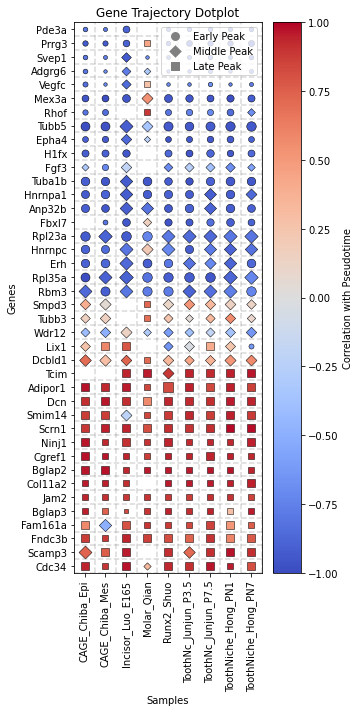

In [68]:
dottable = attributes.to_dot_table(genes = top5_genes_by_cluster.gene[::-1])
fig = plot_trajectory_dotplot(dottable,dot_scale=100,col_spacing = 0.5, save_path="../../../results/trajectory/20250415_trajdtw_fit/20250417_dotplot.pdf")


In [35]:
top10_genes_by_cluster

,Unnamed: 0,gene,raw_score,normalized_score,n_valid_samples,was_filtered,cluster
0,15742,2810417H13Rik,-3.213036,0.995744,2,False,0
1,9773,Tmod2,-4.247119,0.990165,2,False,0
2,3732,Sgip1,-4.364907,0.989530,2,False,0
3,7680,Btbd11,-4.511837,0.988737,2,False,0
4,5439,Ephb6,-4.786558,0.987255,4,False,0
5,1643,Gm14005,-5.826802,0.981643,2,False,1
6,8998,Pck2,-9.573589,0.961428,9,False,1
7,12707,Wisp1,-9.687112,0.960816,8,False,1
8,507,Slc45a3,-10.411335,0.956909,8,False,1
9,8018,Tcim,-11.650064,0.950226,7,False,1


In [ ]:
attributes = calculate_trajectory_attributes(result["reshaped_data"], result["filtered_genes"], result["batch_names"])
dottable = attributes.to_dot_table(genes = gene_conservation)
fig = plot_trajectory_dotplot(dottable,dot_scale=100,col_spacing = 0.5)